# Cleaned Dataset

Importing dataset and libraries, then reducing dataset using stratified sampling based on target feature

In [5]:
import sanity_checks_methods
import ML_algorithms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

#### Dropping null values

Print null and duplicates values before removing them. After show operation results

In [6]:
sanity_checks_methods.print_null_duplicates_values(df)
df = sanity_checks_methods.drop_null_values(df)
df.drop_duplicates(inplace=True)
sanity_checks_methods.print_null_duplicates_values(df)

total rows: 10000
Null Value Counts:
sex                  1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.01
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  0.00
smoking_status       0.00
stroke               0.00
dtype: float64

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Feature: sex
Null Count: 1
Null Percentage: 0.01%

Feature: age
Null Count: 0
Null Percentage: 0.00%

Feature: hypertension
Null Count: 0
Null Percentage: 0.00%

Feature: heart_disease
Null Count: 0
Null Percentage: 0.00%

Feature: ever_married
Null Count: 0
Null Percentage: 0.00%

Feature: work_type
Null Co

#### Dropping outliers 

no outliers detected
no outliers detected


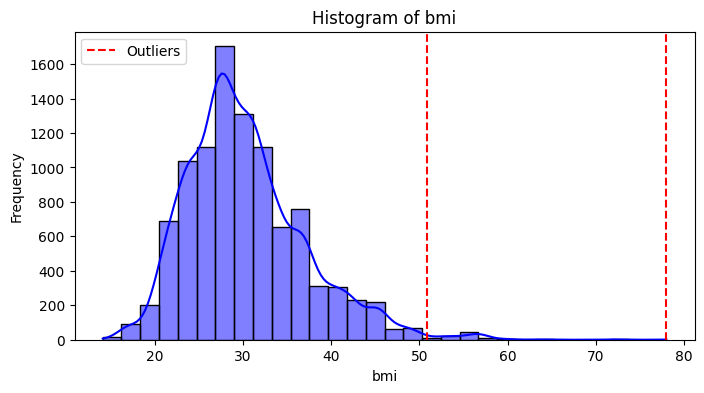

no outliers detected
no outliers detected
no outliers detected


In [7]:
sanity_checks_methods.visualize_outliers(df)
df = sanity_checks_methods.drop_outliers(df)
sanity_checks_methods.visualize_outliers(df)

#### Dropping negative values for features BMI, age and avg_glucose_level

In [8]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)
    
for feature in numerical_features:  
    df = sanity_checks_methods.drop_negative_values(df, feature)
    
for feature in numerical_features:  
    sanity_checks_methods.check_negative_values(df, feature)

abnormal values present in age feature
       sex  age  hypertension  heart_disease  ever_married  work_type  \
13764  0.0 -1.0             0              0             1          4   
10175  1.0 -2.0             1              0             1          3   
11840  0.0 -2.0             1              0             1          3   
14940  0.0 -2.0             0              0             0          4   
9808   1.0 -3.0             0              1             1          3   
9936   1.0 -1.0             1              0             1          4   
13788  0.0 -1.0             1              0             1          4   
11716  1.0 -5.0             0              0             0          4   
10549  1.0 -4.0             1              0             1          4   
12639  0.0 -2.0             0              0             1          4   
11952  1.0 -3.0             1              0             0          3   
14844  0.0 -3.0             0              1             1          2   
10826  1.0 -

dropping inconsistencies

In [9]:

df = sanity_checks_methods.drop_inconsistencies(df)

## Models


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3299
           1       0.96      0.99      0.98      3255

    accuracy                           0.98      6554
   macro avg       0.98      0.98      0.98      6554
weighted avg       0.98      0.98      0.98      6554

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1434
           1       0.91      0.99      0.95      1375

    accuracy                           0.95      2809
   macro avg       0.95      0.95      0.95      2809
weighted avg       0.95      0.95      0.95      2809

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5000
           1     

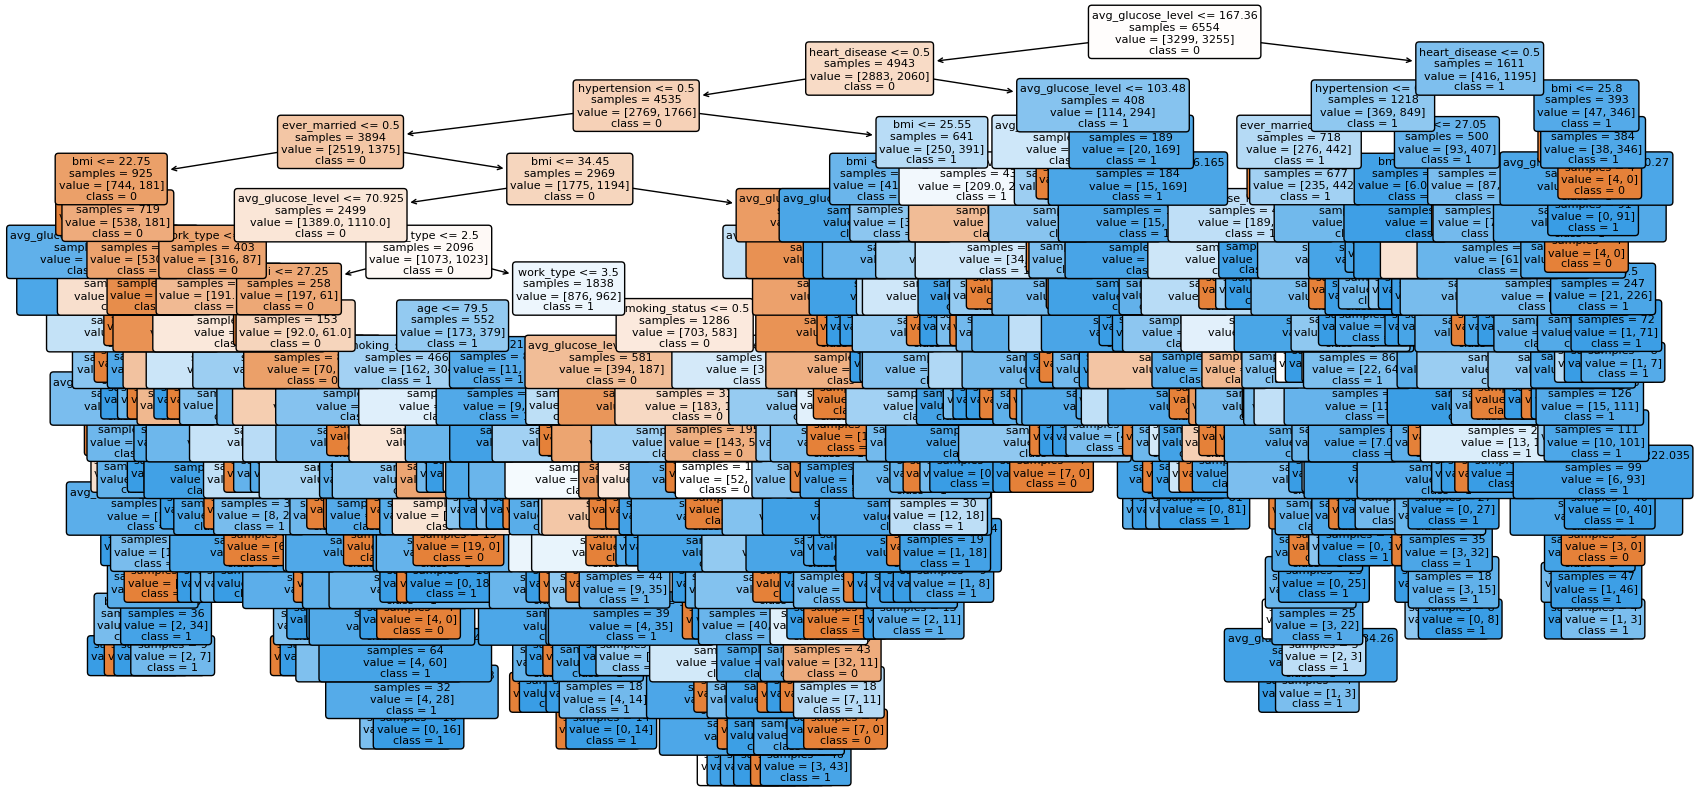

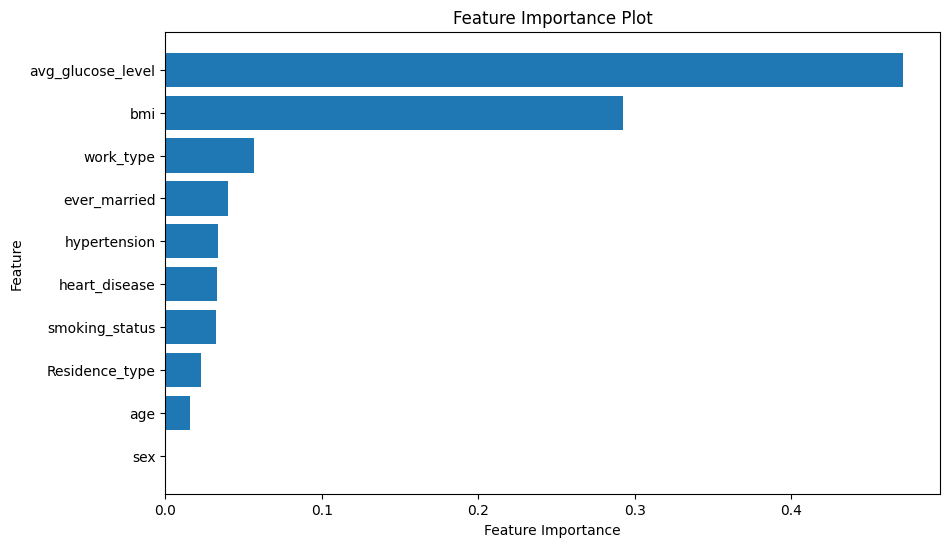

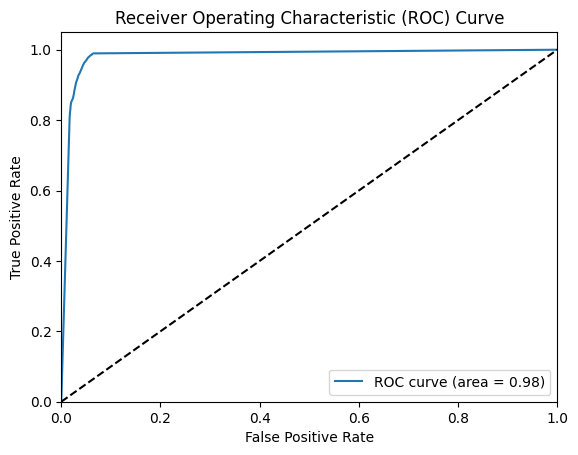

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9818889800000001
Accuracy for each fold: [0.9496951219512195, 0.9390243902439024, 0.9740853658536586, 0.9359756097560976, 0.9526717557251908, 0.9557251908396946, 0.932824427480916, 0.9419847328244275, 0.9496183206106871, 0.9633587786259542]
Mean accuracy: 0.9494963693911748
95% confidence interval: (0.9403459741904379, 0.9586467645919117)


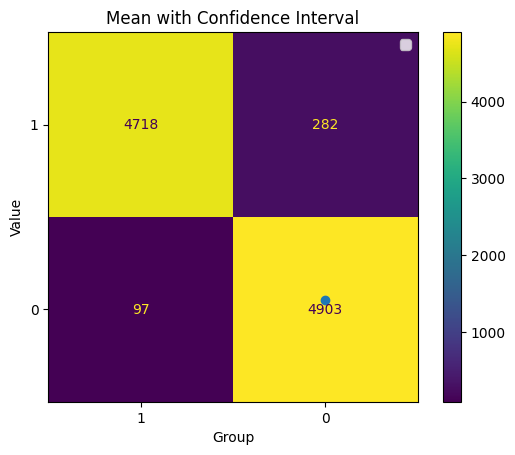


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [10]:
print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 